In [34]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import cv2
import numpy as np
import pickle
import glob
from image_process import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


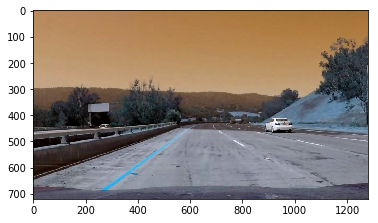

In [35]:
difficult_image=cv2.imread("./project_video_images/frame2.jpeg")
plt.imshow(difficult_image)

In [36]:
hls=cv2.cvtColor(difficult_image,cv2.COLOR_RGB2HLS)

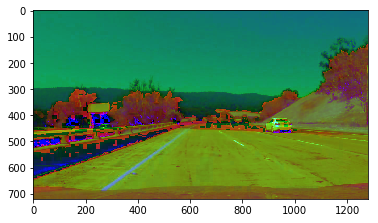

In [37]:
plt.imshow(hls)

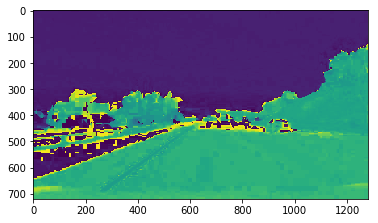

In [38]:
plt.imshow(hls[:,:,0])

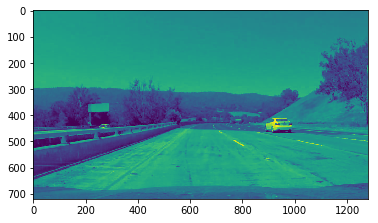

In [39]:
plt.imshow(hls[:,:,1])

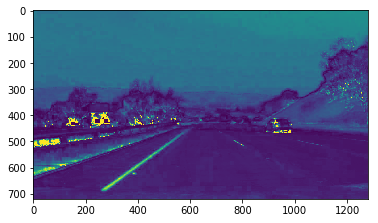

In [40]:
plt.imshow(hls[:,:,2])

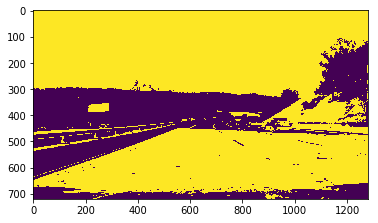

In [41]:
s_binary_1=hls_select(difficult_image,thresh=(100,200),channel=1)
plt.imshow(s_binary_1)

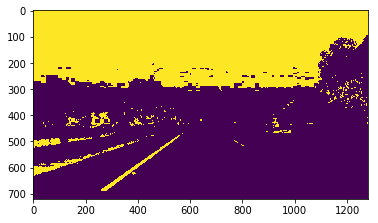

In [42]:
s_binary_2=hls_select(difficult_image,thresh=(90,255),channel=2)
plt.imshow(s_binary_2)

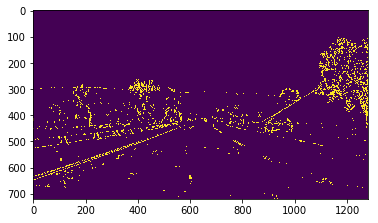

In [43]:
ksize=3
gradx = abs_sobel_thresh(difficult_image, orient='x', sobel_kernel=ksize, thresh=(20, 100))
plt.imshow(gradx)

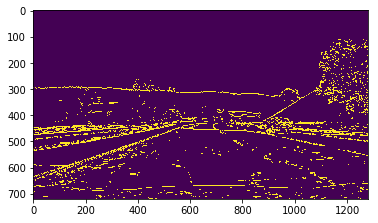

In [44]:
ksize=3
grady = abs_sobel_thresh(difficult_image, orient='y', sobel_kernel=ksize, thresh=(20, 100))
plt.imshow(grady)

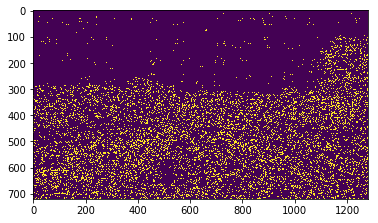

In [45]:
dir_binary=dir_threshold(difficult_image,thresh=(0.9,1.2),sobel_kernel=3)
plt.imshow(dir_binary)

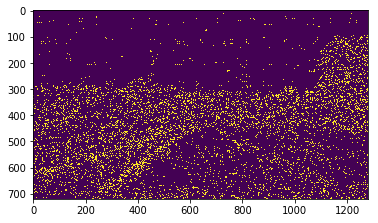

In [46]:
dir_binary_2=dir_threshold(hls[:,:,2],thresh=(0.9,1.2),sobel_kernel=3,to_gray=False)
plt.imshow(dir_binary_2)

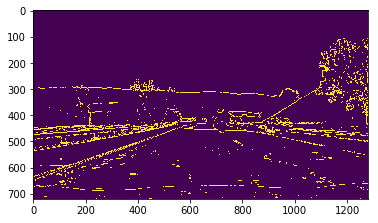

In [47]:
mag_binary=mag_thresh(difficult_image,mag_thresh=(30,100))
plt.imshow(mag_binary)

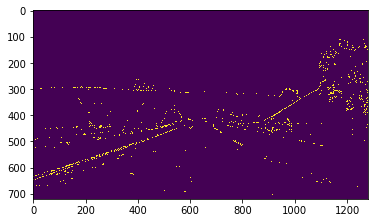

In [48]:
combined=np.zeros_like(dir_binary)
combined[((gradx==1) & (grady==1))]=1
plt.imshow(combined)

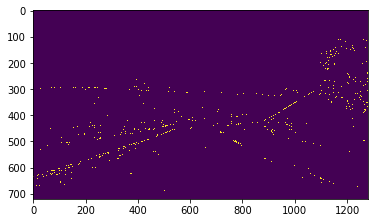

In [49]:
combined=np.zeros_like(dir_binary)
combined[((dir_binary==1) & (mag_binary==1))]=1
plt.imshow(combined)

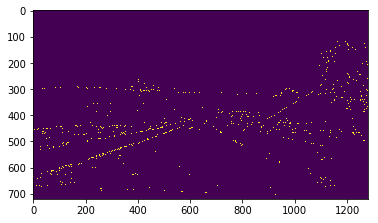

In [50]:
combined=np.zeros_like(dir_binary)
combined[((dir_binary_2==1) & (mag_binary==1))]=1
plt.imshow(combined)

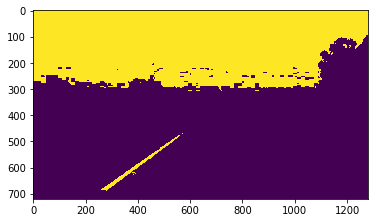

In [51]:
combined=np.zeros_like(dir_binary)
combined[(s_binary_1==1) & (s_binary_2==1)]=1
plt.imshow(combined)

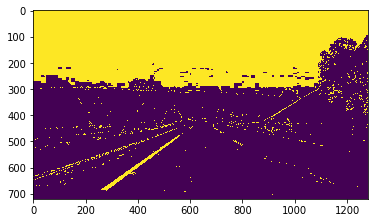

In [52]:
combined=np.zeros_like(dir_binary)
combined[((dir_binary==1) & (mag_binary==1))|((gradx==1) &(grady==1))|((s_binary_1==1) & (s_binary_2==1))]=1
plt.imshow(combined)

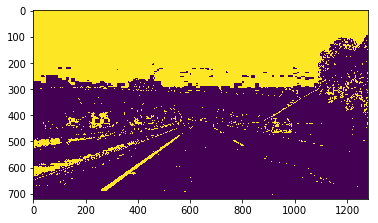

In [53]:
combined=np.zeros_like(dir_binary)
combined[((dir_binary==1) & (mag_binary==1))|((gradx==1) &(grady==1))|((s_binary_2==1))]=1
plt.imshow(combined)

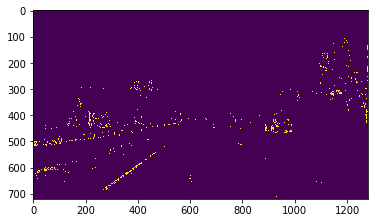

In [54]:
_,ege_image=edge_pipeline(difficult_image)
plt.imshow(ege_image)